## Blood Fat
- https://datainclude.me/posts/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EC%B4%88_(1)_(Basic_of_Deeplearning_1)/

In [16]:
# !pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 MB 8.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 3.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 3.5 MB/s eta 0:00:00a 0:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 7.5 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 10.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 9.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [1]:
import numpy as np

In [3]:
raw_data = np.genfromtxt('https://raw.githubusercontent.com/hmkim312/datas/main/blood%20fat/x09.txt', skip_header=36)
raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

### Visualization

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

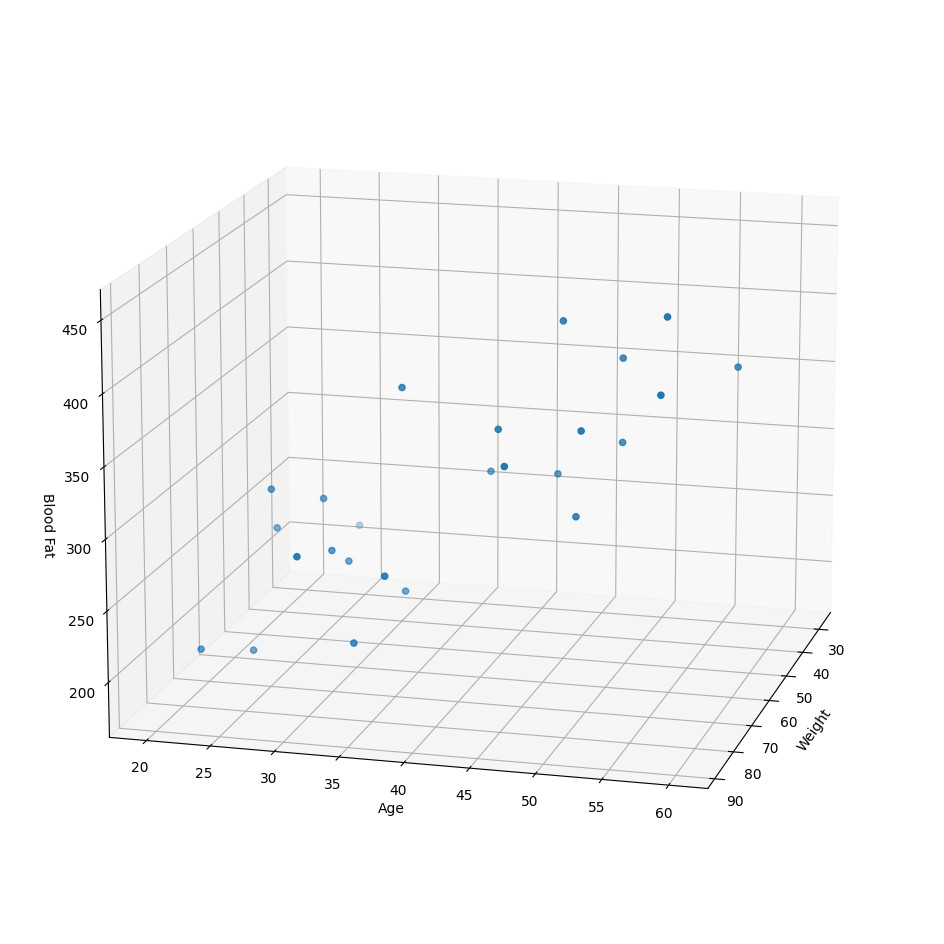

In [7]:
xs = np.array(raw_data[:, 2], dtype = np.float32)
ys = np.array(raw_data[:, 3], dtype = np.float32)
zs = np.array(raw_data[:, 4], dtype = np.float32)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood Fat')
ax.view_init(15,15)
plt.show()

### Linear Regression
- $y = WX + b$
- E.g., Given Weight, and Age, what is Blood Fat?
    - To answer this, we need the weight and bias of the model. 

In [13]:
x_data = np.array(raw_data[:, 2:4], dtype=np.float32)
y_data = np.array(raw_data[:, 4], dtype=np.float32)
y_data = y_data.reshape((25,1))

In [15]:
y_data.shape, x_data.shape

((25, 1), (25, 2))

#### Model with two input nodes and one output node

In [17]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2, )),
])

model.compile(optimizer='rmsprop', loss='mse')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


3 parameters = 2 input weights and 1 bias node.

#### Model Fitting

In [20]:
hist = model.fit(x_data, y_data, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 4ms/step - loss: 77475.9375
Epoch 2/5000
1/1 [==============================] - 0s 4ms/step - loss: 77404.0625
Epoch 3/5000
1/1 [==============================] - 0s 2ms/step - loss: 77333.8281
Epoch 4/5000
1/1 [==============================] - 0s 3ms/step - loss: 77264.9688
Epoch 5/5000
1/1 [==============================] - 0s 3ms/step - loss: 77197.2891
Epoch 6/5000
1/1 [==============================] - 0s 3ms/step - loss: 77130.6250
Epoch 7/5000
1/1 [==============================] - 0s 2ms/step - loss: 77064.8438
Epoch 8/5000
1/1 [==============================] - 0s 2ms/step - loss: 76999.8281
Epoch 9/5000
1/1 [==============================] - 0s 2ms/step - loss: 76935.5000
Epoch 10/5000
1/1 [==============================] - 0s 3ms/step - loss: 76871.7578
Epoch 11/5000
1/1 [==============================] - 0s 2ms/step - loss: 76808.5312
Epoch 12/5000
1/1 [==============================] - 0s 2ms/step - loss: 76745.7734
E

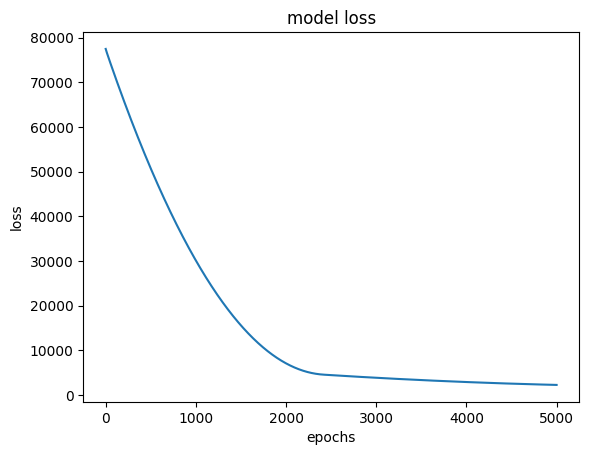

In [21]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

#### Prediction

In [24]:
model.predict(np.array([100,44]).reshape(1,2))

1/1 [==============================] - 0s 34ms/step


array([[393.94696]], dtype=float32)

In [26]:
model.predict(np.array([75,29]).reshape(1,2))

1/1 [==============================] - 0s 13ms/step


array([[280.79834]], dtype=float32)

In [27]:
W_, b_ = model.get_weights()
print('Weight: ', W_)
print('Bias: ', b_)

Weight:  [[2.1399686]
 [3.9766276]]
Bias:  [4.9784822]


In [28]:
x = np.linspace(20, 100, 50).reshape(50,1)
y = np.linspace(10, 70, 50).reshape(50,1)

X = np.concatenate((x, y), axis=1)
Z = np.matmul(X, W_) + b_

In [29]:
X

array([[ 20.        ,  10.        ],
       [ 21.63265306,  11.2244898 ],
       [ 23.26530612,  12.44897959],
       [ 24.89795918,  13.67346939],
       [ 26.53061224,  14.89795918],
       [ 28.16326531,  16.12244898],
       [ 29.79591837,  17.34693878],
       [ 31.42857143,  18.57142857],
       [ 33.06122449,  19.79591837],
       [ 34.69387755,  21.02040816],
       [ 36.32653061,  22.24489796],
       [ 37.95918367,  23.46938776],
       [ 39.59183673,  24.69387755],
       [ 41.2244898 ,  25.91836735],
       [ 42.85714286,  27.14285714],
       [ 44.48979592,  28.36734694],
       [ 46.12244898,  29.59183673],
       [ 47.75510204,  30.81632653],
       [ 49.3877551 ,  32.04081633],
       [ 51.02040816,  33.26530612],
       [ 52.65306122,  34.48979592],
       [ 54.28571429,  35.71428571],
       [ 55.91836735,  36.93877551],
       [ 57.55102041,  38.16326531],
       [ 59.18367347,  39.3877551 ],
       [ 60.81632653,  40.6122449 ],
       [ 62.44897959,  41.83673469],
 

In [30]:
Z

array([[ 87.5441308 ],
       [ 95.90729705],
       [104.27046329],
       [112.63362954],
       [120.99679578],
       [129.35996203],
       [137.72312827],
       [146.08629451],
       [154.44946076],
       [162.812627  ],
       [171.17579325],
       [179.53895949],
       [187.90212574],
       [196.26529198],
       [204.62845823],
       [212.99162447],
       [221.35479072],
       [229.71795696],
       [238.08112321],
       [246.44428945],
       [254.8074557 ],
       [263.17062194],
       [271.53378818],
       [279.89695443],
       [288.26012067],
       [296.62328692],
       [304.98645316],
       [313.34961941],
       [321.71278565],
       [330.0759519 ],
       [338.43911814],
       [346.80228439],
       [355.16545063],
       [363.52861688],
       [371.89178312],
       [380.25494937],
       [388.61811561],
       [396.98128185],
       [405.3444481 ],
       [413.70761434],
       [422.07078059],
       [430.43394683],
       [438.79711308],
       [447

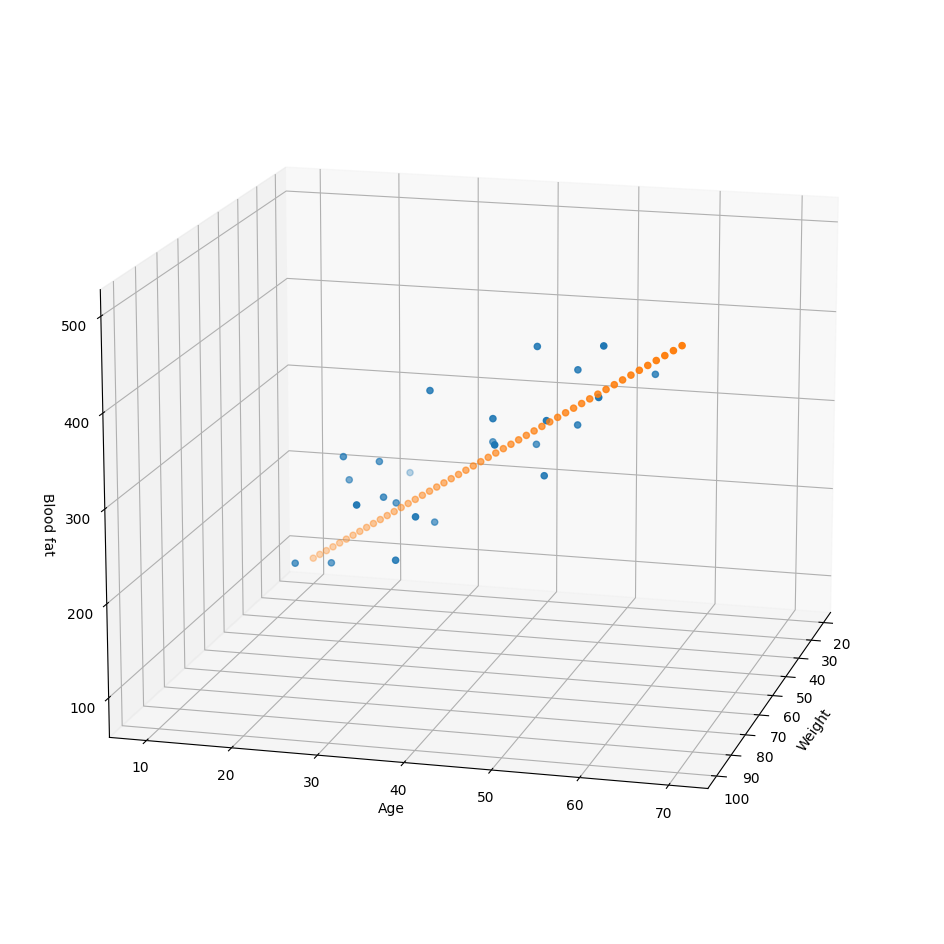

In [31]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.scatter(x, y, Z)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()